In [13]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [14]:
import pyspark
import pandas
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local) created by __init__ at /var/folders/6g/m1xt_rtx2yd2h1tkjqcz8tyh0000gn/T/ipykernel_18951/2252054858.py:5 

In [12]:
pip install matplotlib

     |████████████████████████████████| 7.3 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 4.0 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.3.2-cp37-cp37m-macosx_10_9_x86_64.whl (61 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
     |████████████████████████████████| 3.0 MB 1.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
day1 = spark.read.csv('data/day1.csv', header=False, inferSchema=True)


In [15]:
%matplotlib inline

/Users/mariskavanwilligen/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fe238d7e090> has a label of '_c0' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


<AxesSubplot:>

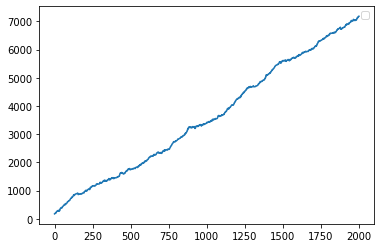

In [18]:
day1.toPandas().plot()

In [50]:
day1.limit(5).toPandas()

,_c0
0,170
1,176
2,179
3,180
4,195


In [51]:
from pyspark.sql.functions import monotonically_increasing_id

# This will return a new DF with all the columns + id
day1 = day1.withColumn("id", monotonically_increasing_id())
day1.limit(5).toPandas()

,_c0,id
0,170,0
1,176,1
2,179,2
3,180,3
4,195,4


In [47]:
day1.count()

2000

In [55]:
day1.toPandas()

,_c0,id
0,170,0
1,176,1
2,179,2
3,180,3
4,195,4
...,...,...
1995,7158,1995
1996,7165,1996
1997,7181,1997
1998,7179,1998


In [62]:
from pyspark.sql.window import Window
import pyspark.sql.functions as F

w = Window.orderBy('id')
#day1.withColumn('lag', F.lag(F.col("_c0")).over(w)).limit(5).toPandas()
# day1 = day1.withColumn('diff', F.col("_c0") - F.lag(F.col("_c0")).over(w)).where(F.col('diff') > 0)
# day1.toPandas()

day1_out = day1.toPandas().rolling(3).agg('sum')


spark.createDataFrame(day1_out).withColumn('diff', F.col("_c0") - F.lag(F.col("_c0")).over(w)).where(F.col('diff') > 0).toPandas

DataFrame[_c0: double, id: double, diff: double]

In [23]:
day1 = day1.withColumn('diff', F.col("_c0") - F.lag(F.col("_c0")).over(w)).where(F.col('diff') > 0)
day1.toPandas()

instant         int32
dteday         object
season          int32
yr              int32
mnth            int32
holiday         int32
weekday         int32
workingday      int32
weathersit      int32
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int32
registered      int32
cnt             int32
dtype: object

In [42]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [44]:
import pandas as pd
import shap
import sklearn

wine_data = spark.read.csv('data/winequality-red.csv', header=True, inferSchema=True,sep = ';' )
wine_data = wine_data.toPandas()
y = wine_data['quality']
X = wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]


# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [45]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(8))

Model coefficients:

fixed acidity = 0.02499055
volatile acidity = -1.08359026
citric acid = -0.18256395
residual sugar = 0.01633127
chlorides = -1.87422516
free sulfur dioxide = 0.00436133
total sulfur dioxide = -0.00326458
density = -17.88116383
pH = -0.41365314
sulphates = 0.91633441
alcohol = 0.2761977
